# Sentiment Analysis for Podcast Review

## Import packages

In [ ]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
from random import randint
from numpy import array, argmax, asarray, zeros
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# nltk
import nltk

# preprocessing
import contractions
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.util import ngrams

# vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# model_selection
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

# classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# evaluation
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, confusion_matrix

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Masking,SimpleRNN,LSTM, Masking
from keras.models import Model
from keras.initializers import Constant

#gensim
import gensim

# textacy
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols

# spacy
import spacy
import en_core_web_md

# BeautifulSoup libraray
from bs4 import BeautifulSoup 

# regex
import re 

## Import data

In [ ]:
df = pd.read_csv('podcast_sample.csv', lineterminator='\n', index_col = 0) 

In [ ]:
# check dataframe
df.head()

,podcast_id,title,content,rating,author_id,created_at,itunes_id,slug,itunes_url,podcast_title,category
0,b313ef8ef0d5b64290d3036ff1bbf2d2,감성 라디오 음악도시,미국 서부에 있는 유학생이에요. 성시경씨 제대 후 라디오 복귀만 기다려오다가 6 월...,5,664CCA7142E9AE8,2011-09-14T13:25:46-07:00,442838670,fm-%EC%9D%8C%EC%95%85%EB%8F%84%EC%8B%9C-%EC%A2...,https://podcasts.apple.com/us/podcast/fm-%EC%9...,FM 음악도시(종영),music
1,abfb842993be20d21bfae7103addc5e9,They’ve really cut back on the content this se...,Last season there was a new pod every 3-4 days...,1,AD790CE113DCBC1,2018-04-11T13:46:47-07:00,1015394113,the-good-phight-for-philadelphia-phillies-fans,https://podcasts.apple.com/us/podcast/the-good...,The Good Phight: for Philadelphia Phillies fans,sports
2,ebdf879a424547d01862a9bbba18a0f3,Good info. source...,Bob brings a lot of knowledge to any firearm d...,4,E223A4B2642C970,2010-01-19T08:11:43-07:00,333180229,handgun-world-podcast,https://podcasts.apple.com/us/podcast/handgun-...,Handgun World Podcast,news
3,ab2fdb7db023b223d870487165d11ff3,Mixed,They have lost much of thier credibility by de...,3,E1E7DBE750D119E,2021-01-28T12:21:49-07:00,971901464,wsj-opinion-potomac-watch,https://podcasts.apple.com/us/podcast/wsj-opin...,WSJ Opinion: Potomac Watch,news
4,ca601bd1524322d0527b16adf2738ff3,Try it now!,Even better than I expected. I was interested ...,5,D7CA4858AFA2CFC,2017-08-24T10:55:20-07:00,1257821731,conversations-with-people-who-hate-me,https://podcasts.apple.com/us/podcast/conversa...,Conversations with People Who Hate Me,society


In [ ]:
df.tail()

,podcast_id,title,content,rating,author_id,created_at,itunes_id,slug,itunes_url,podcast_title,category
49995,a0f4bdf8c437e34e5b6a17698fbdf64d,🔥Sussy🔥,"A little bit $u$, make an episode on plant pol...",2,45C72657925F18D,2022-03-28T07:16:21-07:00,1103320303,but-why-a-podcast-for-curious-kids,https://podcasts.apple.com/us/podcast/but-why-...,But Why: A Podcast for Curious Kids,kids
49996,d5683ccc88341197ca42aad82111c96f,Jumping butterballs!!,"If you are a Marx Brothers fan, and have been ...",5,AAF30F4EAE42219,2018-05-28T18:10:19-07:00,1363963113,the-marx-brothers-council-podcast,https://podcasts.apple.com/us/podcast/the-marx...,The Marx Brothers Council Podcast,tv
49997,cc546886c2be6370d76bd638f5256ba6,Way too much junkie commercials,I love the show very interesting I’m telling t...,1,2032AE3B4B98F1F,2020-05-20T17:01:07-07:00,1484888427,autopsy-the-last-hours-of,https://podcasts.apple.com/us/podcast/autopsy-...,Autopsy: The Last Hours Of…,society
49998,aaeb50f39da1a9a1d2e3837cf4edb2d0,Awful,Kelly Havens is not inspirational. Her husband...,1,ED81029C263B8BA,2022-01-15T13:36:52-07:00,1494284839,simple-farmhouse-life,https://podcasts.apple.com/us/podcast/simple-f...,Simple Farmhouse Life,leisure
49999,bb7d6672764b565662154a695b9f0d64,More of this!,Marty brings out the best in everyone he inter...,5,ECF8AECAC5EE567,2018-08-25T04:51:04-07:00,1359891248,marty-smiths-america-the-podcast,https://podcasts.apple.com/us/podcast/marty-sm...,Marty Smith's America The Podcast,sports


In [ ]:
# Check basic data quality
print(f'Data shape: {df.shape} \n')
print(f'Data Types: \n{df.dtypes} \n')
print(f'Misiing Values: \n{df.isnull().sum()}')

Data shape: (50000, 11) 

Data Types: 
podcast_id       object
title            object
content          object
rating            int64
author_id        object
created_at       object
itunes_id         int64
slug             object
itunes_url       object
podcast_title    object
category         object
dtype: object 

Misiing Values: 
podcast_id       0
title            0
content          0
rating           0
author_id        0
created_at       0
itunes_id        0
slug             0
itunes_url       0
podcast_title    1
category         0
dtype: int64


In [ ]:
# Look at unique values
df.nunique()

podcast_id       15073
title            38918
content          49969
rating               5
author_id        47501
created_at       49994
itunes_id        15073
slug             15038
itunes_url       15073
podcast_title    15046
category            19
dtype: int64

In [ ]:
# rating distribution
df['rating'].value_counts() / len(df)

5    0.43474
1    0.23660
4    0.13024
3    0.10598
2    0.09244
Name: rating, dtype: float64

In [ ]:
# define positive (1) and negative (0)
df['sentiment'] = [1 if i>=4 else 0 for i in df['rating']]

In [ ]:
# sentiment distribution
df['sentiment'].value_counts() / len(df)

1    0.56498
0    0.43502
Name: sentiment, dtype: float64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

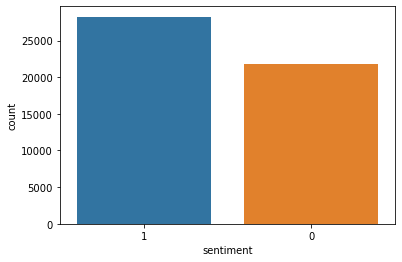

In [ ]:
# plot the nagative and positive
sns.countplot(x = df.sentiment, data = df, order = df['sentiment'].value_counts().index)

In [ ]:
# concat review content and title
df['review'] = df['title']+' '+df['content']

## Traditional ML Modelling

### Text Preprocessing

In [ ]:
# convert contraction
df['clean_content'] = df['review'].apply(lambda x: contractions.fix(x))

In [ ]:
# word count
def count_words(lines, delimiter = " "):
    words = Counter()
    for line in lines:
        for word in line.split(delimiter):
            words[word] += 1
    return words
counter = count_words(df['clean_content'])
counter.most_common(20)

[('the', 95444),
 ('to', 79728),
 ('and', 78603),
 ('I', 73217),
 ('is', 56210),
 ('a', 53192),
 ('of', 44966),
 ('not', 26755),
 ('it', 26088),
 ('you', 25379),
 ('this', 25006),
 ('', 24102),
 ('for', 23690),
 ('in', 22516),
 ('that', 22497),
 ('are', 21678),
 ('podcast', 20395),
 ('have', 20016),
 ('but', 18475),
 ('on', 17690)]

In [ ]:
# define functions
# Lemmatization
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

# Lowercase, Delete punctuation, strange sign, emoji, stopwords and Perform lemmatization
nltk.download('punkt')
nltk.download('stopwords')
stop_word = stopwords.words('english')
# emoji = re.compile("["
#     u"\U0001F600-\U0001F64F"  # emoticons
#     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#     u"\U0001F680-\U0001F6FF"  # transport & map symbols
#     u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#     u"\U00002500-\U00002BEF"  # chinese char
#     u"\U00002702-\U000027B0"
#     u"\U00002702-\U000027B0"
#     u"\U000024C2-\U0001F251"
#     u"\U0001f926-\U0001f937"
#     u"\U00010000-\U0010ffff"
#     u"\u2640-\u2642" 
#     u"\u2600-\u2B55"
#     u"\u200d"
#     u"\u23cf"
#     u"\u23e9"
#     u"\u231a"
#     u"\ufe0f"  # dingbats
#     u"\u3030"
#                     "]+", re.UNICODE)

def clean_review(review):
    cleanreview = review.lower() # lowercase
    cleanreview = re.sub(r'[^\w\s]', '', cleanreview) # remove punctuation
    cleanreview = re.sub(r'\n(?:\n|N)', '', cleanreview) # remove some strage signs
    cleanreview = urls(cleanreview) # urls
    cleanreview = hashtags(cleanreview) # hashtags
    cleanreview = numbers(cleanreview) # numbers
    cleanreview = currency_symbols(cleanreview) #currency
    cleanreview = emojis(cleanreview) # emoji
    cleanreview = emails(cleanreview) # emails
    cleanreview = " ".join(word for word in cleanreview.split() if word not in stop_word) # remove stopwords
    cleanreview = lemmatize_sentence(cleanreview)
    cleanreview = re.sub(r'\b(pod(?:s?|casts?)|episodes?|gets?|shows?|makes?|really|uses?|knows?|wants?|hears?|comes?|lot|thinks?|years?||minutes?|listens?|ones?|times?|would|story|go(?:es)?|people|says?|hosts?|guys?)\b',  ' ', cleanreview) # remove unuseful words
    return cleanreview

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nat_k\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nat_k\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# clean the data
df['clean_content'] = df['clean_review'].apply(clean_review)

In [ ]:
# check word count again after cleaning data
counter = count_words(df['clean_content'])
counter.most_common(20)

[('', 2975568),
 ('love', 17308),
 ('_NUMBER_', 13982),
 ('like', 13974),
 ('great', 13770),
 ('good', 9872),
 ('much', 6452),
 ('talk', 6141),
 ('keep', 5331),
 ('way', 5076),
 ('well', 5019),
 ('work', 4729),
 ('can', 4709),
 ('not', 4675),
 ('every', 4671),
 ('give', 4649),
 ('need', 4534),
 ('find', 4452),
 ('best', 4326),
 ('new', 4291)]

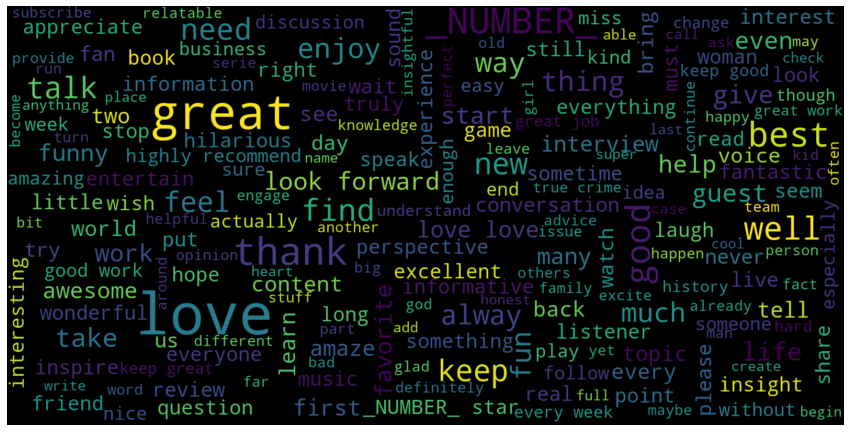

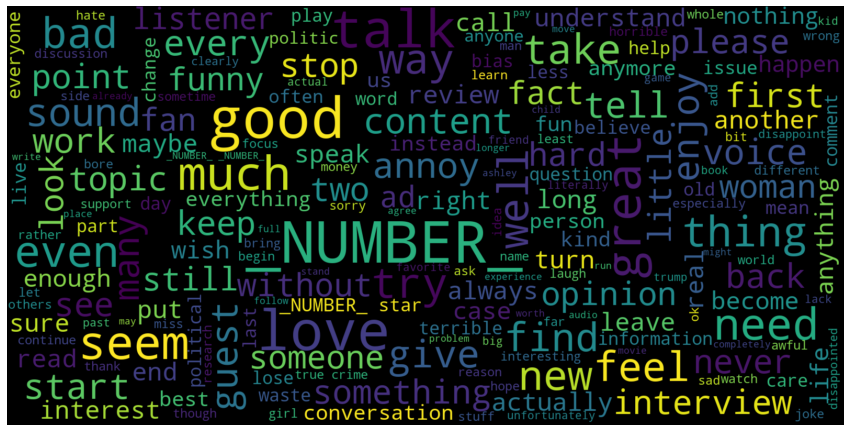

In [ ]:
# word cloud
# positive
consolidated = ' '.join(word for word in df['clean_content'][df['sentiment'] == 1].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

# negative
consolidated = ' '.join(word for word in df['clean_content'][df['sentiment'] == 0].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Bigram word cloud

In [ ]:
def get_ngrams(text, n = 2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
    return ' '.join(returnVal).strip()

Pandas Apply:   0%|          | 0/28249 [00:00<?, ?it/s]

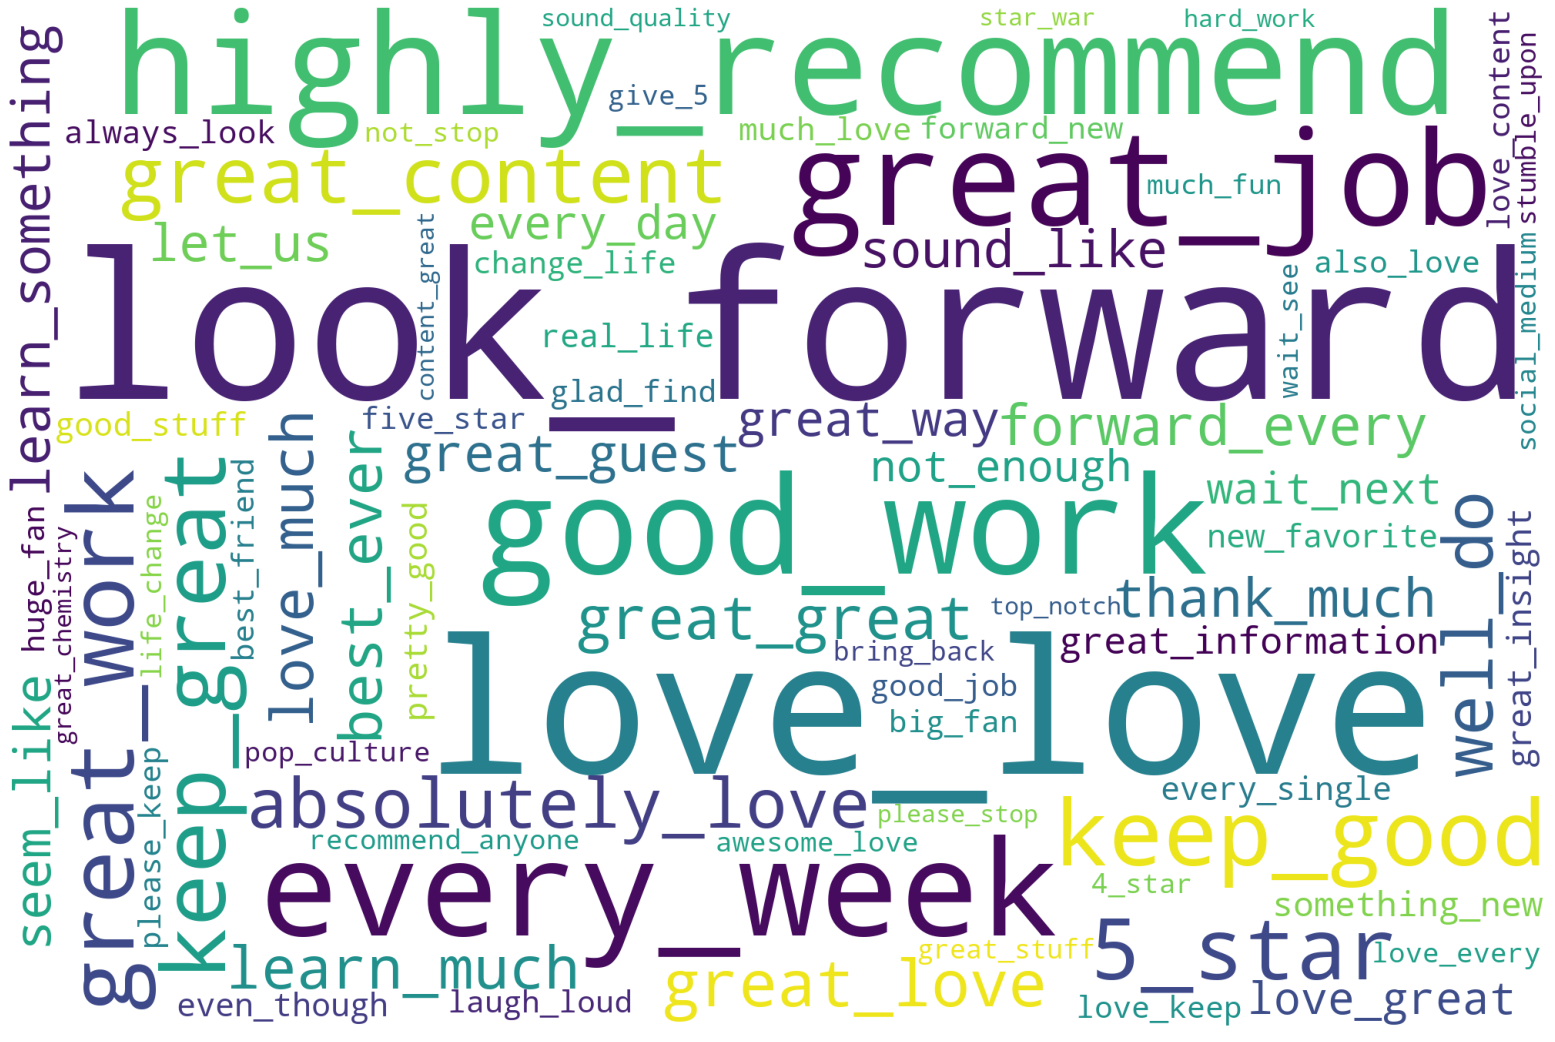

In [ ]:
# Positive
# Create bigram
df["bigram_text_positive"] = df["clean_content"][df['sentiment'] == 1].swifter.apply(get_ngrams, n = 2)

content_string_list = df['bigram_text_positive'].dropna().tolist()
content_string_positive = ' '.join(content_string_list)
positive = content_string_positive.split(" ")
join_positive = ' '.join([word for word in positive if word not in ('can_not', 'feel_like', 'not_wait', 'true_crime', '_NUMBER_star')])
wordcloud = WordCloud(width = 2000, height = 1334, random_state = 1, 
                      background_color = 'white', max_words = 75, collocations = False, normalize_plurals = False).generate(join_positive)

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize = (25, 17), dpi = 80)
    plt.tight_layout(pad = 0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()
plot_cloud(wordcloud)

# can_not, feel_like, not_wait, true_crime, _NUMBER_star

Pandas Apply:   0%|          | 0/21751 [00:00<?, ?it/s]

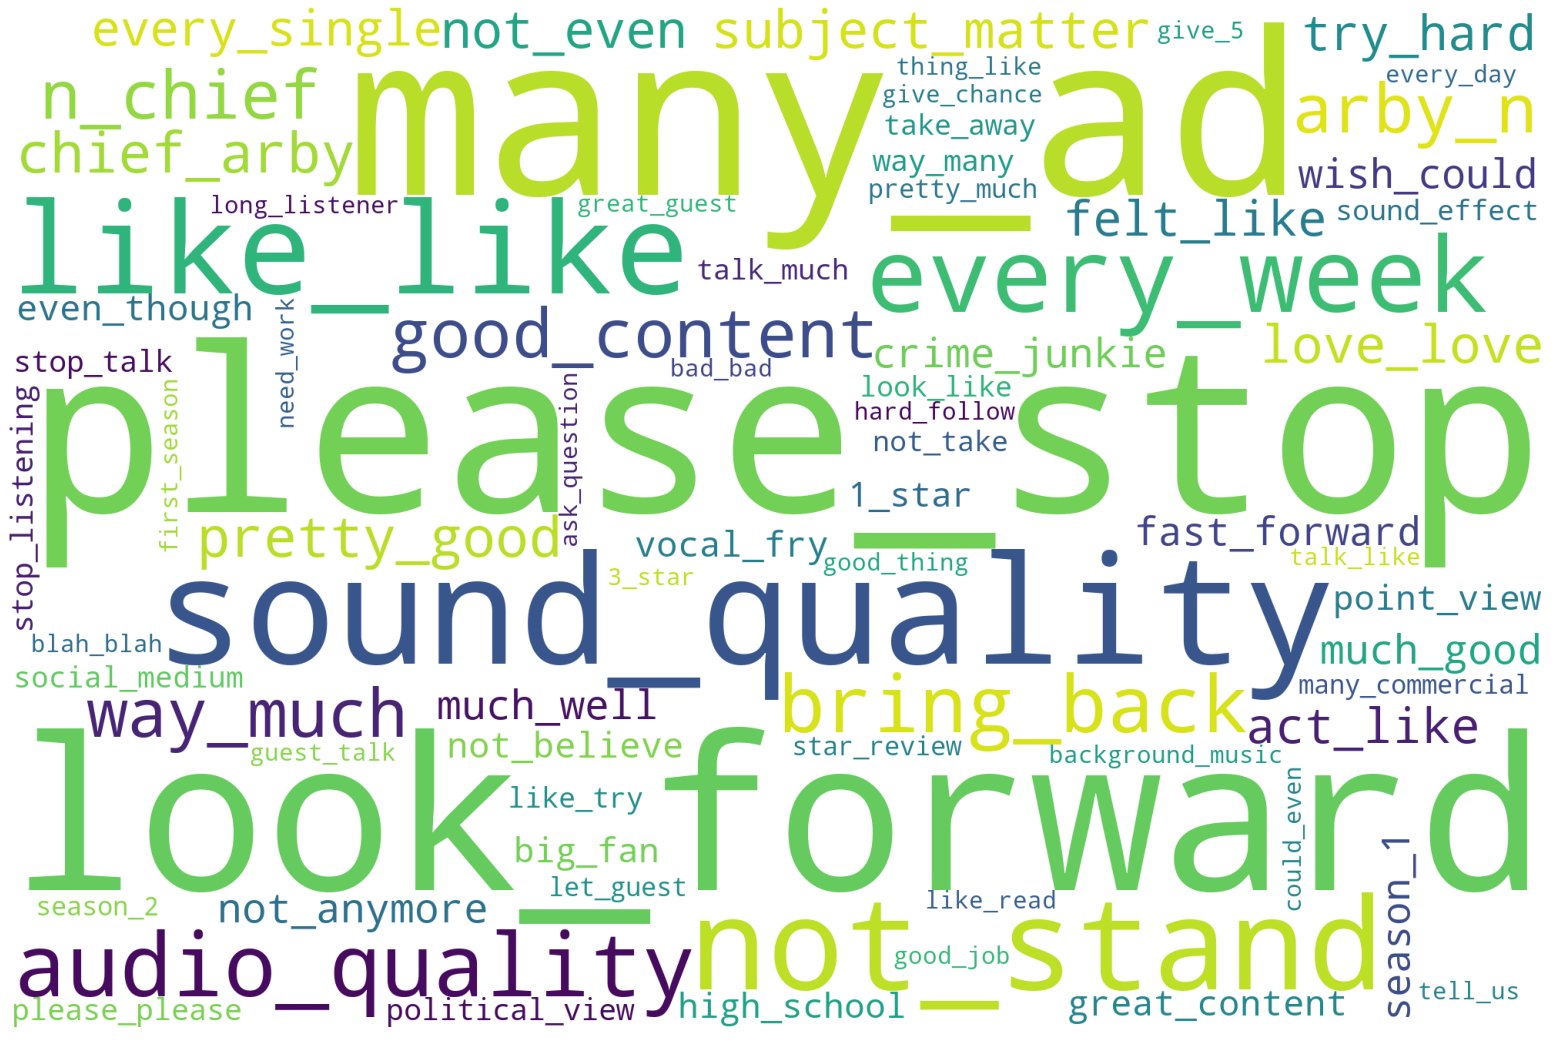

In [ ]:
# Negative
# Create bigram
df["bigram_text_negative"] = df["clean_content"][df['sentiment'] == 0].swifter.apply(get_ngrams, n = 2)

content_string_list = df['bigram_text_negative'].dropna().tolist()
content_string_negative = ' '.join(content_string_list)
negative = content_string_negative.split(" ")
join_negative = ' '.join([word for word in negative if word not in ('sound_like', 'can_not', 'feel_like', 'seem_like', 'true_crime', 'let_us', '5_star')])
wordcloud = WordCloud(width = 2000, height = 1334, random_state = 1, 
                      background_color = 'white', max_words = 75, collocations = False, normalize_plurals = False).generate(join_negative)

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize = (25, 17), dpi = 80)
    plt.tight_layout(pad = 0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()
plot_cloud(wordcloud)

# sound_like, can_not, feel_like, seem_like, true_crime, _NUMBER_star, _NUMBER_min, _NUMBER_old, _NUMBER__NUMBER_, first_NUMBER_

### Modelling

#### Count Vectorizer

In [ ]:
# Check the balanced of train-testing dataset
countvect = CountVectorizer(ngram_range = (1,1), binary = True)
X = countvect.fit_transform(df['clean_content'])
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

print(f"Rating proportion_Train: {np.count_nonzero(y_train == 1) / len(y_train)}")
print(f"Rating proportion_Test: {np.count_nonzero(y_test == 1) / len(y_test)}")

Rating proportion_Train: 0.5647
Rating proportion_Test: 0.5661


In [ ]:
# # Hyperparameter Tuning
# # Logistic Regression
# lg_param = {'penalty' : ['l1','l2','elasticnet'], 
#              'C': np.logspace(-3,3,7),
#              'solver'  : ['newton-cg', 'lbfgs', 'liblinear','sag'],
#              'max_iter' : np.arange(50,151,5)}
# lg = LogisticRegression()
# lg_cv = RandomizedSearchCV(lg, lg_param, cv = 5, n_iter = 10, n_jobs = -1)
# lg_cv.fit(X_train, y_train)
# print('Logistic Regression:')
# print(f"Best score: {lg_cv.best_score_}")
# print(f"Best parameters: {lg_cv.best_params_}")

# Naive Bayes
# gnb_param = {'var_smoothing': np.logspace(-9,9,10)}
# gnb = GaussianNB()
# gnb_cv = RandomizedSearchCV(gnb, gnb_param, cv = 5, n_iter = 10, n_jobs = -1)
# gnb_cv.fit(X_train.toarray(), y_train
# print('\n Naive Bayes:')
# print(f"Best score: {gnb_cv.best_score_}")
# print(f"Best parameters: {gnb_cv.best_params_}")

# # Decision Tree
# dt_param = {'criterion' : ['gini','entropy','log_loss'], 
#             'splitter' : ['best','random'],
#              'max_depth': list(range(2,51,2))+[None],
#              'min_samples_split'  : list(range(2,51,2)),
#              'min_samples_leaf'  : list(range(1,51,2))}
# dt = DecisionTreeClassifier()
# dt_cv = RandomizedSearchCV(dt, dt_param, cv = 5, n_iter = 10, n_jobs = -1)
# dt_cv.fit(X_train, y_train)
# print('\n Decision Trees:')
# print(f"Best score: {dt_cv.best_score_}")
# print(f"Best parameters: {dt_cv.best_params_}")

# # Random Forest
# rf_param = {'max_depth': np.arange(2, 11),
#             'min_samples_leaf': [1, 2, 4],
#             'min_samples_split': [2, 5, 10],
#             'n_estimators': np.arange(50, 201, 50),
#             'criterion': ['gini', 'entropy', 'log_loss']}
# rf = RandomForestClassifier()
# rf_cv = RandomizedSearchCV(rf, rf_param, cv = 5, n_iter = 10, n_jobs = -1)
# rf_cv.fit(X_train, y_train)
# print('\n Random Forest:')
# print(f"Best score: {rf_cv.best_score_}")
# print(f"Best parameters: {rf_cv.best_params_}")

# # SVM
# svc_param = {'C': [0.1, 1, 10, 100, 1000]+['scale'],  
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              'kernel': ['linear','poly','rbf','sigmoid']}
# svc = SVC()
# svc_cv = RandomizedSearchCV(svc, svc_param, cv = 5, n_iter = 10, n_jobs = -1)
# svc_cv.fit(X_train, y_train)
# print('\n Support Vector Machine:')
# print(f"Best score: {svc_cv.best_score_}")
# print(f"Best parameters: {svc_cv.best_params_}")

In [ ]:
# Logistic Regression
def lg_countvect(n, m, x_text, y_text):
    countvect = CountVectorizer(ngram_range = (n,m), binary = True)
    X = countvect.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    lr = LogisticRegression(solver = 'liblinear', penalty = 'l2', 
                            max_iter = 60, C = 0.1).fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Naive Bayes
def gnb_countvect(n, m, x_text, y_text):
    countvect = CountVectorizer(ngram_range = (n,m), binary = True, min_df = 0.1)
    X = countvect.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size = 0.2, random_state = 20)
    gnb = GaussianNB().fit(X_train, y_train)
    y_train_pred = gnb.predict(X_train)
    y_test_pred = gnb.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Decision Tree
def dt_countvect(n, m, x_text, y_text):
    countvect = CountVectorizer(ngram_range = (n,m), binary = True)
    X = countvect.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)
    dt = DecisionTreeClassifier(splitter = 'random', min_samples_split = 38, min_samples_leaf = 27,
                                max_depth = 50, criterion = 'entropy').fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Random Forest
def rf_countvect(n, m, x_text, y_text):
    countvect = CountVectorizer(ngram_range = (n,m), binary = True)
    X = countvect.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    rf = RandomForestClassifier(n_estimators = 150, min_samples_split = 5, min_samples_leaf = 1,
                                max_depth = 10, criterion = 'gini').fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# SVM
def svc_countvect(n, m, x_text, y_text):
    countvect = CountVectorizer(ngram_range = (n,m), binary = True, min_df = 0.1)
    X = countvect.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    svc = SVC(probability = True).fit(X_train, y_train)
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

##### Unigram

In [ ]:
lg_countvect(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.8909
Testing accuracy: 0.854
AUROC score: 0.9238486144184123
F1 score: 0.854
Confusion Matrix: 
[[3544  795]
 [ 665 4996]]


In [ ]:
gnb_countvect(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.638425
Testing accuracy: 0.6397
AUROC score: 0.6944307144881959
F1 score: 0.6397
Confusion Matrix: 
[[3399  940]
 [2663 2998]]


In [ ]:
dt_countvect(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.7691428571428571
Testing accuracy: 0.7562666666666666
AUROC score: 0.8312560734589747
F1 score: 0.7562666666666666
Confusion Matrix: 
[[4978 1579]
 [2077 6366]]


In [ ]:
rf_countvect(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.605
Testing accuracy: 0.5984
AUROC score: 0.9002990016031786
F1 score: 0.5984
Confusion Matrix: 
[[ 346 3993]
 [  23 5638]]


In [ ]:
svc_countvect(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.639925
Testing accuracy: 0.6429
AUROC score: 0.6703156188196113
F1 score: 0.6429
Confusion Matrix: 
[[3130 1209]
 [2362 3299]]


##### Bigram

In [ ]:
lg_countvect(2,2,df['clean_content'], df['sentiment'])

Training accuracy: 0.9558
Testing accuracy: 0.7641
AUROC score: 0.8662830706199333
F1 score: 0.7641
Confusion Matrix: 
[[2549 1790]
 [ 569 5092]]


In [ ]:
# gnb_countvect(2,2,df['clean_content'], df['sentiment'])

In [ ]:
dt_countvect(2,2,df['clean_content'], df['sentiment'])

Training accuracy: 0.6201428571428571
Testing accuracy: 0.6142
AUROC score: 0.6695716158185787
F1 score: 0.6142
Confusion Matrix: 
[[1112 5445]
 [ 342 8101]]


In [ ]:
rf_countvect(2,2,df['clean_content'], df['sentiment'])

Training accuracy: 0.5647
Testing accuracy: 0.5661
AUROC score: 0.7663528257186325
F1 score: 0.5661
Confusion Matrix: 
[[   0 4339]
 [   0 5661]]


In [ ]:
# svc_countvect(2,2,df['clean_content'], df['sentiment'])

##### Trigram

In [ ]:
lg_countvect(3,3,df['clean_content'], df['sentiment'])

Training accuracy: 0.936025
Testing accuracy: 0.5976
AUROC score: 0.719994529187485
F1 score: 0.5976
Confusion Matrix: 
[[ 405 3934]
 [  90 5571]]


In [ ]:
# gnb_countvect(3,3,df['clean_content'], df['sentiment'])

In [ ]:
dt_countvect(3,3,df['clean_content'], df['sentiment'])

Training accuracy: 0.5826571428571429
Testing accuracy: 0.5786
AUROC score: 0.5669874492851442
F1 score: 0.5786
Confusion Matrix: 
[[ 339 6218]
 [ 103 8340]]


In [ ]:
rf_countvect(3,3,df['clean_content'], df['sentiment'])

Training accuracy: 0.5647
Testing accuracy: 0.5661
AUROC score: 0.5845520425187739
F1 score: 0.5661
Confusion Matrix: 
[[   0 4339]
 [   0 5661]]


In [ ]:
# svc_countvect(3,3,df['clean_content'], df['sentiment'])

#### TF-IDF Vectorizer

In [ ]:
# Check the balanced of train-testing dataset
tfidf = TfidfVectorizer(ngram_range = (1,1), binary = True)
X = tfidf.fit_transform(df['clean_content'])
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

print(f"Rating proportion_Train: {np.count_nonzero(y_train == 1) / len(y_train)}")
print(f"Rating proportion_Test: {np.count_nonzero(y_test == 1) / len(y_test)}")

Rating proportion_Train: 0.5647
Rating proportion_Test: 0.5661


In [ ]:
# # Hyperparameter Tuning
# # Logistic Regression
# lg_param = {'penalty' : ['l1','l2','elasticnet'], 
#              'C': np.logspace(-3,3,7),
#              'solver'  : ['newton-cg', 'lbfgs', 'liblinear','sag'],
#              'max_iter' : np.arange(50,151,5)}
# lg = LogisticRegression()
# lg_cv = RandomizedSearchCV(lg, lg_param, cv = 5, n_iter = 10, n_jobs = -1)
# lg_cv.fit(X_train, y_train)
# print('Logistic Regression:')
# print(f"Best score: {lg_cv.best_score_}")
# print(f"Best parameters: {lg_cv.best_params_}")

# # Naive Bayes
# gnb_param = {'var_smoothing': np.logspace(-9,9,10)}
# gnb = GaussianNB()
# gnb_cv = RandomizedSearchCV(gnb, gnb_param, cv = 5, n_iter = 10, n_jobs = -1)
# gnb_cv.fit(X_train.toarray(), y_train
# print('\n Naive Bayes:')
# print(f"Best score: {gnb_cv.best_score_}")
# print(f"Best parameters: {gnb_cv.best_params_}")

# # Decision Tree
# dt_param = {'criterion' : ['gini','entropy','log_loss'], 
#             'splitter' : ['best','random'],
#              'max_depth': list(range(2,51,2))+[None],
#              'min_samples_split'  : list(range(2,51,2)),
#              'min_samples_leaf'  : list(range(1,51,2))}
# dt = DecisionTreeClassifier()
# dt_cv = RandomizedSearchCV(dt, dt_param, cv = 5, n_iter = 10, n_jobs = -1)
# dt_cv.fit(X_train, y_train)
# print('\n Decision Trees:')
# print(f"Best score: {dt_cv.best_score_}")
# print(f"Best parameters: {dt_cv.best_params_}")

# # Random Forest
# rf_param = {'max_depth': np.arange(2, 11),
#             'min_samples_leaf': [1, 2, 4],
#             'min_samples_split': [2, 5, 10],
#             'n_estimators': np.arange(50, 201, 50),
#             'criterion': ['gini', 'entropy', 'log_loss']}
# rf = RandomForestClassifier()
# rf_cv = RandomizedSearchCV(rf, rf_param, cv = 5, n_iter = 10, n_jobs = -1)
# rf_cv.fit(X_train, y_train)
# print('\n Random Forest:')
# print(f"Best score: {rf_cv.best_score_}")
# print(f"Best parameters: {rf_cv.best_params_}")

# # SVM
# svc_param = {'C': [0.1, 1, 10, 100, 1000]+['scale'],  
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              'kernel': ['linear','poly','rbf','sigmoid']}
# svc = SVC()
# svc_cv = RandomizedSearchCV(svc, svc_param, cv = 5, n_iter = 10, n_jobs = -1)
# svc_cv.fit(X_train, y_train)
# print('\n Support Vector Machine:')
# print(f"Best score: {svc_cv.best_score_}")
# print(f"Best parameters: {svc_cv.best_params_}")

In [ ]:
# Logistic Regression
def lg_tfidf(n, m, x_text, y_text):
    tfidf = TfidfVectorizer(ngram_range = (n,m), binary = True)
    X = tfidf.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    lr = LogisticRegression(solver = 'sag', penalty = 'l2', max_iter = 90, C = 1.0).fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Naive Bayes
def gnb_tfidf(n, m, x_text, y_text):
    tfidf = TfidfVectorizer(ngram_range = (n,m), binary = True, min_df = 0.1)
    X = tfidf.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size = 0.2, random_state = 20)
    gnb = GaussianNB().fit(X_train, y_train)
    y_train_pred = gnb.predict(X_train)
    y_test_pred = gnb.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Decision Tree
def dt_tfidf(n, m, x_text, y_text):
    tfidf = TfidfVectorizer(ngram_range = (n,m), binary = True)
    X = tfidf.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    dt = DecisionTreeClassifier(splitter = 'best', min_samples_split = 10, min_samples_leaf = 35, 
                                max_depth = 38, criterion = 'entropy').fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Random Forest
def rf_tfidf(n, m, x_text, y_text):
    tfidf = TfidfVectorizer(ngram_range = (n,m), binary = True)
    X = tfidf.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, min_samples_leaf = 1, 
                                max_depth = 10, criterion = 'log_loss').fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# SVM
def svc_tfidf(n, m, x_text, y_text):
    tfidf = TfidfVectorizer(ngram_range = (n,m), binary = True)
    X = tfidf.fit_transform(x_text)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    svc = SVC(probability = True).fit(X_train, y_train)
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

##### Unigram

In [ ]:
lg_tfidf(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.901075
Testing accuracy: 0.8621
AUROC score: 0.931117694976269
F1 score: 0.8621
Confusion Matrix: 
[[3631  708]
 [ 671 4990]]


In [ ]:
gnb_tfidf(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.635675
Testing accuracy: 0.6373
AUROC score: 0.6904419230178758
F1 score: 0.6373
Confusion Matrix: 
[[3436  903]
 [2724 2937]]


In [ ]:
dt_tfidf(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.7685
Testing accuracy: 0.754
AUROC score: 0.8199818923352402
F1 score: 0.754
Confusion Matrix: 
[[3454  885]
 [1575 4086]]


In [ ]:
rf_tfidf(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.614575
Testing accuracy: 0.6061
AUROC score: 0.884441522986593
F1 score: 0.6061
Confusion Matrix: 
[[ 435 3904]
 [  35 5626]]


In [ ]:
svc_tfidf(1,1,df['clean_content'], df['sentiment'])

Training accuracy: 0.975225
Testing accuracy: 0.8657
AUROC score: 0.9317824935546558
F1 score: 0.8657
Confusion Matrix: 
[[3668  671]
 [ 672 4989]]


##### Bigram

In [ ]:
lg_tfidf(2,2,df['clean_content'], df['sentiment'])

Training accuracy: 0.9735
Testing accuracy: 0.7595
AUROC score: 0.8757239676670827
F1 score: 0.7595
Confusion Matrix: 
[[2420 1919]
 [ 486 5175]]


In [ ]:
# gnb_tfidf(2,2,df['clean_content'], df['sentiment'])

In [ ]:
dt_tfidf(2,2,df['clean_content'], df['sentiment'])

Training accuracy: 0.612575
Testing accuracy: 0.6084
AUROC score: 0.6526184074887357
F1 score: 0.6084
Confusion Matrix: 
[[ 656 3683]
 [ 233 5428]]


In [ ]:
rf_tfidf(2,2,df['clean_content'], df['sentiment'])

Training accuracy: 0.5647
Testing accuracy: 0.5661
AUROC score: 0.7321109255073437
F1 score: 0.5661
Confusion Matrix: 
[[   0 4339]
 [   0 5661]]


In [ ]:
# svc_tfidf(2,2,df['clean_content'], df['sentiment'])

##### Trigram

In [ ]:
lg_tfidf(3,3,df['clean_content'], df['sentiment'])

Training accuracy: 0.992275
Testing accuracy: 0.5852
AUROC score: 0.7215999875259937
F1 score: 0.5852
Confusion Matrix: 
[[ 239 4100]
 [  48 5613]]


In [ ]:
# gnb_tfidf(3,3,df['clean_content'], df['sentiment'])

In [ ]:
dt_tfidf(3,3,df['clean_content'], df['sentiment'])

Training accuracy: 0.580375
Testing accuracy: 0.5794
AUROC score: 0.5616864848254569
F1 score: 0.5794
Confusion Matrix: 
[[ 201 4138]
 [  68 5593]]


In [ ]:
rf_tfidf(3,3,df['clean_content'], df['sentiment'])

Training accuracy: 0.5647
Testing accuracy: 0.5661
AUROC score: 0.5697403611330648
F1 score: 0.5661
Confusion Matrix: 
[[   0 4339]
 [   0 5661]]


In [ ]:
# svc_tfidf(3,3,df['clean_content'], df['sentiment'])

#### Word2Vec

In [ ]:
# Create word embedding
nlp = spacy.load('en_core_web_md')
w2v = []
for num in range(len(df)):
    doc = nlp(df['clean_content'][num])
    processed_text = " ".join([str(token) for token in doc if not token.is_stop])
    w2v.append(np.array(nlp(processed_text).vector))

In [ ]:
# Check the balanced of train-testing dataset
X = np.array(w2v)
y = df["sentiment"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

print(f"Rating proportion_Train: {np.count_nonzero(y_train == 1) / len(y_train)}")
print(f"Rating proportion_Test: {np.count_nonzero(y_test == 1) / len(y_test)}")

Rating proportion_Train: 0.5647
Rating proportion_Test: 0.5661


In [ ]:
# # Hyperparameter Tuning
# # Logistic Regression
# lg_param = {'penalty' : ['l1','l2','elasticnet'], 
#              'C': np.logspace(-3,3,7),
#              'solver'  : ['newton-cg', 'lbfgs', 'liblinear','sag'],
#              'max_iter' : np.arange(50,151,5)}
# lg = LogisticRegression()
# lg_cv = RandomizedSearchCV(lg, lg_param, cv = 5, n_iter = 10, n_jobs = -1)
# lg_cv.fit(X_train, y_train)
# print('Logistic Regression:')
# print(f"Best score: {lg_cv.best_score_}")
# print(f"Best parameters: {lg_cv.best_params_}")

# # Naive Bayes
# gnb_param = {'var_smoothing': np.logspace(-9,9,10)}
# gnb = GaussianNB()
# gnb_cv = RandomizedSearchCV(gnb, gnb_param, cv = 5, n_iter = 10, n_jobs = -1)
# gnb_cv.fit(X_train.toarray(), y_train
# print('\n Naive Bayes:')
# print(f"Best score: {gnb_cv.best_score_}")
# print(f"Best parameters: {gnb_cv.best_params_}")

# # Decision Tree
# dt_param = {'criterion' : ['gini','entropy','log_loss'], 
#             'splitter' : ['best','random'],
#              'max_depth': list(range(2,51,2))+[None],
#              'min_samples_split'  : list(range(2,51,2)),
#              'min_samples_leaf'  : list(range(1,51,2))}
# dt = DecisionTreeClassifier()
# dt_cv = RandomizedSearchCV(dt, dt_param, cv = 5, n_iter = 10, n_jobs = -1)
# dt_cv.fit(X_train, y_train)
# print('\n Decision Trees:')
# print(f"Best score: {dt_cv.best_score_}")
# print(f"Best parameters: {dt_cv.best_params_}")

# # Random Forest
# rf_param = {'max_depth': np.arange(2, 11),
#             'min_samples_leaf': [1, 2, 4],
#             'min_samples_split': [2, 5, 10],
#             'n_estimators': np.arange(50, 201, 50),
#             'criterion': ['gini', 'entropy', 'log_loss']}
# rf = RandomForestClassifier()
# rf_cv = RandomizedSearchCV(rf, rf_param, cv = 5, n_iter = 10, n_jobs = -1)
# rf_cv.fit(X_train, y_train)
# print('\n Random Forest:')
# print(f"Best score: {rf_cv.best_score_}")
# print(f"Best parameters: {rf_cv.best_params_}")

# # SVM
# svc_param = {'C': [0.1, 1, 10, 100, 1000]+['scale'],  
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              'kernel': ['linear','poly','rbf','sigmoid']}
# svc = SVC()
# svc_cv = RandomizedSearchCV(svc, svc_param, cv = 5, n_iter = 10, n_jobs = -1)
# svc_cv.fit(X_train, y_train)
# print('\n Support Vector Machine:')
# print(f"Best score: {svc_cv.best_score_}")
# print(f"Best parameters: {svc_cv.best_params_}")

In [ ]:
# Logistic Regression
def lg_w2v(embedding, y_text):
    X = np.array(embedding)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    lr = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 90, C = 1000.0).fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Naive Bayes
def gnb_w2v(embedding, y_text):
    X = np.array(embedding)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    gnb = GaussianNB().fit(X_train, y_train)
    y_train_pred = gnb.predict(X_train)
    y_test_pred = gnb.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Decision Tree
def dt_w2v(embedding, y_text):
    X = np.array(embedding)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    dt = DecisionTreeClassifier(splitter = 'random', min_samples_split = 4, min_samples_leaf = 43, 
                                max_depth = 36, criterion = 'gini').fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# Random Forest
def rf_w2v(embedding, y_text):
    X = np.array(embedding)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    rf = RandomForestClassifier(n_estimators = 150, min_samples_split = 5, min_samples_leaf = 4, 
                                max_depth = 10, criterion = 'gini').fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

# SVM
def svc_w2v(embedding, y_text):
    X = np.array(embedding)
    y = y_text.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
    svc = SVC(probability = True).fit(X_train, y_train)
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    print(f"Training accuracy: {np.mean(y_train_pred == y_train)}")
    print(f"Testing accuracy: {np.mean(y_test_pred == y_test)}")
    print(f"AUROC score: {roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])}")
    print(f"F1 score: {f1_score(y_test, y_test_pred, average = 'micro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

In [ ]:
lg_w2v(w2v, df['sentiment'])

Training accuracy: 0.82965
Testing accuracy: 0.8291
AUROC score: 0.8981242335295181
F1 score: 0.8291
Confusion Matrix: 
[[3446  893]
 [ 816 4845]]


In [ ]:
gnb_w2v(w2v, df['sentiment'])

Training accuracy: 0.769275
Testing accuracy: 0.7664
AUROC score: 0.8419980654705381
F1 score: 0.7664
Confusion Matrix: 
[[3543  796]
 [1540 4121]]


In [ ]:
dt_w2v(w2v, df['sentiment'])

Training accuracy: 0.7785
Testing accuracy: 0.7421
AUROC score: 0.8135323751554111
F1 score: 0.7420999999999999
Confusion Matrix: 
[[3024 1315]
 [1264 4397]]


In [ ]:
rf_w2v(w2v, df['sentiment'])

Training accuracy: 0.8935
Testing accuracy: 0.7994
AUROC score: 0.8782108098093077
F1 score: 0.7994
Confusion Matrix: 
[[3298 1041]
 [ 965 4696]]


In [ ]:
svc_w2v(w2v, df['sentiment'])

Training accuracy: 0.86065
Testing accuracy: 0.8341
AUROC score: 0.9087629445803598
F1 score: 0.8341
Confusion Matrix: 
[[3514  825]
 [ 834 4827]]


## Deep Learning models

### Data preprocessing

In [ ]:
# since deep learning models can deal with documents with stopwords to detect sentiment, 
# the data preprocessing part can be more basic.

def clean_reviews(review):  
    
    # removing html tags
    review_text = BeautifulSoup(review,'lxml').get_text()
    
    # retaining only alphabetical content
    review_text = re.sub('[^a-zA-Z]',' ',review_text)
    
    # converting to lower case and split
    word_tokens = review_text.lower().split()
    
    cleaned_review = ' '.join(word_tokens)
    return cleaned_review

In [ ]:
# create new column with preprocessed text
df['clean_review']=df['review'].apply(clean_reviews)

<AxesSubplot:>

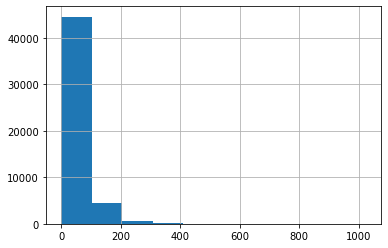

In [ ]:
# check the distribution of text length
for i in range(len(df)):
    df.loc[i,'token'] = len(df.loc[i,'clean_review'].split())
df['token'].hist()

In [ ]:
# check the maximum length of documents
df['token'].max()

1023.0

### With pre-trained word embedding

In [ ]:
docs = df['clean_review'].tolist()
labels = df['sentiment']
# from scipy.spatial.distance import cosine
# nlp = en_core_web_md.load()
# docs = list(map(lambda doc: ' '.join([token.text for token in nlp(doc)]), docs))

# set max lengh of reviews
max_rev_len=400 

#### Text and parameter preparation for modelling

In [ ]:
# tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(docs)

encoded_docs = tokenizer.texts_to_sequences(docs)
padded_docs = pad_sequences(encoded_docs, maxlen=max_rev_len, padding='post')

In [ ]:
# change labels to categorical
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

# split train and test data with fixed test size and random state
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=20)

#### Load in Glove vectors and embeddings

In [ ]:
def load_glove_vectors():
    embeddings_index = {}
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index

embeddings_index = load_glove_vectors()
VOCAB_SIZE = int(len(tokenizer.word_index) * 1.1)

# create a weight matrix for words in training docs
embedding_matrix = zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#### Define RNN and LSTM models

In [ ]:
def make_binary_classification_rnn_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=max_rev_len, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(SimpleRNN(units=64, input_shape=(1, max_rev_len)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # summarize the model
    model.summary()

    return model

def make_lstm_classification_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=max_rev_len, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(LSTM(units=32, input_shape=(1, max_rev_len)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # summarize the model
    model.summary()

    return model


#### Fit RNN model

In [ ]:
rnn_model = make_binary_classification_rnn_model()
history = rnn_model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=3, verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 400, 100)          5356700   
                                                                 
 masking_8 (Masking)         (None, 400, 100)          0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 64)                10560     
                                                                 
 dense_16 (Dense)            (None, 16)                1040      
                                                                 
 dense_17 (Dense)            (None, 2)                 34        
                                                                 
Total params: 5,368,334
Trainable params: 11,634
Non-trainable params: 5,356,700
_________________________________________________________________
Epoch 1/3
1250/1250 [==================

##### Performance review

In [ ]:
# calculate accuracy again
loss, accuracy = rnn_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

313/313 [==============================] - 7s 22ms/step - loss: 0.5231 - accuracy: 0.7509
Accuracy: 75.089997


In [ ]:
# calculate confusion matrix
y_pred = rnn_model.predict(X_test, verbose=1)
pred = encoder.inverse_transform(y_pred.argmax(axis=1))
true = encoder.inverse_transform(y_test.argmax(axis=1))
confusion_matrix(true, pred)


313/313 [==============================] - 8s 24ms/step


array([[2993, 1346],
       [1145, 4516]], dtype=int64)

In [ ]:
# calculate ROC-AUC
roc_auc_score(true, pred)

0.7437645948213577

In [ ]:
# calculate F1 score
f1_score(true, pred, average=None)

array([0.70614604, 0.78382366])

#### Fit LSTM model

In [ ]:
lstm_model = make_lstm_classification_model()
history = lstm_model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=5, verbose=1)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 400, 100)          5356700   
                                                                 
 masking_12 (Masking)        (None, 400, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                17024     
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 2)                 34        
                                                                 
Total params: 5,374,286
Trainable params: 17,586
Non-trainable params: 5,356,700
_________________________________________________________________
Epoch 1/5
1250/1250 [=================

##### Performance review

In [ ]:
# calculate accuracy again
loss, accuracy = lstm_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

313/313 [==============================] - 13s 40ms/step - loss: 0.3151 - accuracy: 0.8676
Accuracy: 86.760002


In [ ]:
# calculate confusion matrix
y_pred = lstm_model.predict(X_test, verbose=1)
pred = encoder.inverse_transform(y_pred.argmax(axis=1))
true = encoder.inverse_transform(y_test.argmax(axis=1))
confusion_matrix(true, pred)


313/313 [==============================] - 18s 46ms/step


array([[3719,  620],
       [ 704, 4957]], dtype=int64)

In [ ]:
# calculate ROC-AUC
roc_auc_score(true, pred)

0.8663751396964525

In [ ]:
# calculate F1 score
f1_score(true, pred, average=None)

array([0.84889295, 0.88218544])

### Train our own embedding

#### Build Word2Vec model

In [ ]:
# define training data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
for review in df['cleaned_review']:
    sents = tokenizer.tokenize(review.strip())
    for sent in sents:
        sentences.append(sent.split())

In [ ]:
# train the word2vec model
w2v_model=gensim.models.Word2Vec(sentences=sentences,vector_size=300,window=10,min_count=1)
w2v_model.train(sentences,epochs=10,total_examples=len(sentences))

(19684069, 26355470)

In [ ]:
# final total number of words
vocab_len = len(w2v_model.wv)
print("The total number of words are : ", vocab_len)

The total number of words are :  48697


#### Text and parameter preparation for modelling

In [ ]:
# tokenize text
tok = Tokenizer(num_words=10000, oov_token='UNKNOWN_TOKEN')
tok.fit_on_texts(df['clean_review'])
encd_rev = tok.texts_to_sequences(df['clean_review'])

# set max lengh of reviews
max_rev_len=400 

# set total number of words
vocab_size = len(tok.word_index) + 1 

# set embedding dimension
embed_dim=300 

# create pad sequence text
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')

In [ ]:
# set sentiment as categorical data
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(df['sentiment']))

In [ ]:
# create embedding matrix
vocab=w2v_model.wv.index_to_key
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)

embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the w2v model
    embed_matrix[i]=embed_vector

In [ ]:
# split train and test data with fixed test size and random state
X_train, X_test, y_train, y_test = train_test_split(pad_rev, labels, test_size=0.2, random_state=20)

#### LSTM model training

In [ ]:
# define LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix)))
model.add(Masking(mask_value=0.0))
model.add(LSTM(units=32, input_shape=(1, max_rev_len)))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# we tried number of epochs 2, 3, 5, 10, epochs = 2 has the best performance
epochs=2
batch_size=64

# fit the model, directly use test data as validation
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test))

Epoch 1/2
625/625 [==============================] - 296s 465ms/step - loss: 0.4277 - accuracy: 0.8204 - val_loss: 0.3183 - val_accuracy: 0.8726
Epoch 2/2
625/625 [==============================] - 292s 467ms/step - loss: 0.2894 - accuracy: 0.8856 - val_loss: 0.2961 - val_accuracy: 0.8808


##### Performance review

In [ ]:
# calculate accuracy again
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

313/313 [==============================] - 24s 78ms/step - loss: 0.2961 - accuracy: 0.8808
Accuracy: 88.080001


In [ ]:
# calculate confusion matrix
y_pred = model.predict(X_test, verbose=1)
pred = encoder.inverse_transform(y_pred.argmax(axis=1))
true = encoder.inverse_transform(y_test.argmax(axis=1))
confusion_matrix(true, pred)

313/313 [==============================] - 29s 90ms/step


array([[3742,  597],
       [ 595, 5066]], dtype=int64)

In [ ]:
# calculate ROC-AUC
roc_auc_score(true, pred)

0.8786527943015613

In [ ]:
# calculate F1 score
f1_score(true, pred, average=None)

array([0.8626095 , 0.89473684])

In [ ]:
import time
start = time.time()
model.predict(pad_rev, verbose=1)
end = time.time()

end-start

1563/1563 [==============================] - 125s 80ms/step


126.23582577705383